# Figure 1: Schematic representation of the potential

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pint

from PyPDF2 import PdfFileReader

idx = pd.IndexSlice
%matplotlib inline

In [2]:
# From https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams['text.latex.preamble'] = [
       #r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       #r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

mpl.rcParams.update({'figure.dpi': 200})

mpl.rcParams.update({'font.size': 10})

ureg = pint.UnitRegistry()
column = 8.68*ureg.cm
two_columns = 18*ureg.cm

In [3]:
potential = pd.read_csv("Potential_Results_Test15_20190130.csv",sep="\t")

R = potential.r.mean()*0.180

In [4]:
R

26.165609850664918

In [5]:
Th = potential.theta_prime
U = potential.potential_landscape

U = U.drop(U[Th.isna()].index)
Th = Th.drop(Th[Th.isna()].index)
U = U[:-1]
Th = Th[:-1]

array([0.        , 0.        , 8.67977168, 2.55764627])

0.00022832307339371027 centimeter : 0.474 centimeter -> 0.4742283230733937 centimeter


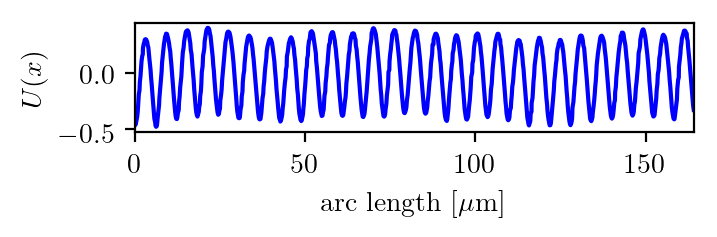

In [7]:
delta = 0.474*ureg.cm
fig, ax = plt.subplots(1,1,figsize=(column+delta).to(ureg.inch).magnitude*np.array([1,.20]),
                 frameon = False)

ax.plot(Th*R,U*R, color = "blue")
ax.set_xlabel("arc length $\mathrm{[\mu{}m]}$");
ax.set_ylabel("$U(x)$");
ax.set_xlim(0,max(Th*R))

fig.savefig('Potential.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

input1 = PdfFileReader(open('Potential.pdf', 'rb'))
size = list(input1.getPage(0).mediaBox)
display(np.array(size,dtype="float")/28.3465)
error = (column.to(ureg.cm).magnitude-np.array(size,dtype="float")/28.3465)[2]*ureg.cm
print(error,":",delta,"->",error+delta)

In [8]:
import pims as pm

In [9]:
video = pm.Video("Test45_2019_04_26_19_03_38.avi")
img = video[244]

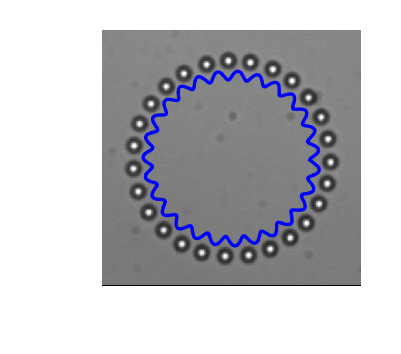

In [10]:
fig = plt.figure(figsize=(column).to(ureg.inch).magnitude*np.array([0.5,0.5]),frameon=False)

center = np.array([367,198])

size = np.array(np.shape(img))

dx = -center[0]+size[1]/2
dy = -center[1]+size[0]/2


plt.imshow(img, extent = [-size[1]/2+dx, size[1]/2+dx,
                          -size[0]/2+dy, size[0]/2+dy])

plt.ylim([-200,200])
plt.xlim([-200,200])

r0 = 130
dr = 0.5e3
dth = -0.02
x = (r0+dr*U)*np.cos(Th+dth)
y = (r0+dr*U)*np.sin(Th+dth)

plt.plot(x,y,color = "blue", linewidth = 1.2)
plt.gca().set_axis_off()

fig.savefig('Exp_Image_wPotential.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

In [11]:
pd.read_csv("curves.dat",sep="\t").filter(["File Name", "test", "N particles", "radius", "lambda"]).tail()

,File Name,test,N particles,radius,lambda
37,Test5_20190605,5,22.0,27.439,6.4516
38,Test4_20190605,6,26.0,27.439,6.4516
39,Test3_20190605,7,30.0,27.439,6.4516
40,Test2_20190605,8,35.0,27.439,6.4516
41,Test1_20190605,9,40.0,27.439,6.4516


## Simulated Field

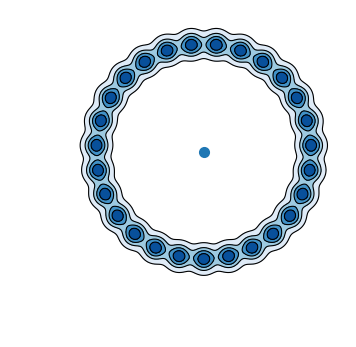

In [12]:
fig = plt.figure(figsize=(column).to(ureg.inch).magnitude*np.array([0.5,0.5]),frameon=False)
plt.gca().set_axis_off()

k = .1
N = 27

x = np.linspace(-1,1,300)*1.2

x = x.reshape(np.size(x),1,1)
y = x.reshape(1,np.size(x),1)

X,Y = np.meshgrid(x,y)

theta = np.linspace(0,2*np.pi,N+1)[:-1]
theta = theta.reshape(1,1,np.size(theta))

U = np.sum(np.exp(-((x+np.cos(theta))**2+(y+np.sin(theta))**2)/k**2),axis=2)

cmap = plt.get_cmap('Blues')

plt.contourf(X,Y,U,cmap = cmap, levels = np.linspace(0.1,1.01,5))
plt.contour(X,Y,U,colors = "black", levels = np.linspace(0.1,1.01,5), linewidths = 0.4)
plt.axis("square");

plt.plot(0,0,'.')

fig.savefig('SimulatedPotential.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

# Figure 2: Current vs Density

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pint
#from PyPDF2 import PdfFileReader


idx = pd.IndexSlice
%matplotlib inline

In [7]:
# From https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams['text.latex.preamble'] = [
       #r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       #r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

mpl.rcParams.update({'figure.dpi': 200})

mpl.rcParams.update({'font.size': 10})

ureg = pint.UnitRegistry()
column = 8.68*ureg.cm
two_columns = 18*ureg.cm

In [8]:
current = pd.read_csv(r"C:/Users/Eric/Desktop/curves_v3.dat",sep="\t")
#current = current.filter(["File Name","sigma","test","N particles","lambda","omega","radius","co_vel","mean_vel"])
current["density"] = current["N particles"]*4/(2*np.pi*current.radius)
current["norm_current"] = current.mean_vel*current.density/current.co_vel

current.head()

,sigma,test,p_density,File Name,N particles,co_vel,codens,error,lambda,mean_vel,omega,radius,sing_codens,vel_error,norm_codens,norm_coerror,density,norm_current
0,0.98,0,0.04,Test30_20190617,1.0,0.347264,0.013891,0.000000,4.1832,0.347264,0.72,17.43,0.012684,0.000000,0.040000,0.000000,0.036524,0.036524
1,0.98,1,0.11,Test29_20190617,3.0,0.347264,0.028860,0.000455,4.1832,0.262363,0.72,17.43,0.012684,0.004137,0.083107,0.001310,0.109573,0.082784
2,0.98,2,0.22,Test28_20190617,6.0,0.347264,0.028533,0.000486,4.1832,0.129695,0.72,17.43,0.012684,0.002209,0.082165,0.001400,0.219146,0.081846
3,0.98,3,0.33,Test27_20190617,9.0,0.347264,0.033324,0.000628,4.1832,0.100981,0.72,17.43,0.012684,0.001904,0.095961,0.001809,0.328719,0.095588
4,0.98,4,0.40,Test26_20190617,11.0,0.347264,0.036578,0.000968,4.1832,0.091445,0.72,17.43,0.012684,0.002419,0.105331,0.002786,0.401768,0.105797


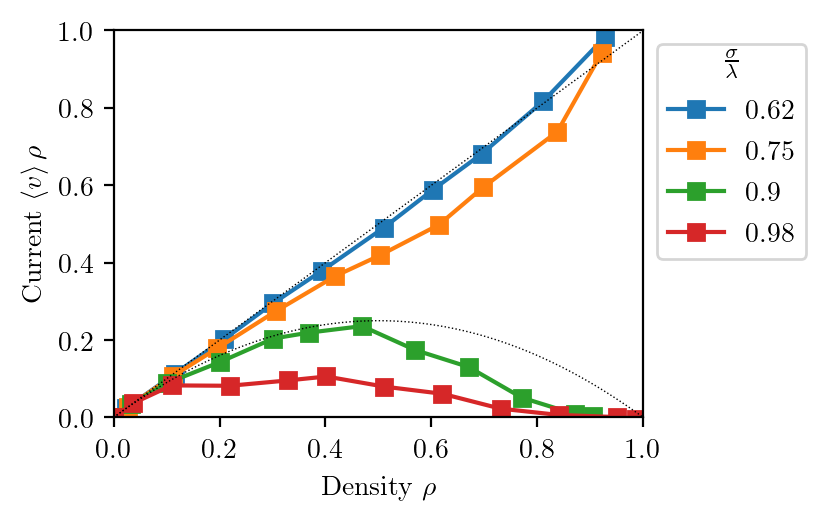

In [9]:
fig, ax = plt.subplots(1,1,figsize=(column).to(ureg.inch).magnitude*np.array([1,.75]))

rho = np.linspace(0,1,100)
for sgm, curr in current.groupby(["sigma"]):
    curr_dens = curr.groupby("density").mean()
    plt.plot(np.insert(curr_dens.index.values,0,0),
             np.insert(curr_dens.norm_current.values,0,0),"-s", label=sgm)

ratio = 1/curr_dens.norm_current.index.min()
ratio = 1
plt.plot(rho,rho*(1-rho)*ratio,':', color="black",linewidth = 0.5)
plt.plot(rho,rho*ratio,':',color="black",linewidth = 0.5)
plt.xlabel(r"Density $\rho$ ")
plt.ylabel(r"Current $\left<v\right>\rho$")
plt.plot([0,1],[0,0], color = "black", linewidth = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(title = r"$\frac{\sigma}{\lambda}$",bbox_to_anchor = (1,1));

fig.savefig('CurrentvsDensity.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

array([0.        , 0.        , 8.68018311, 5.47084707])

-0.00018310793925202518 centimeter : -1.0942 centimeter -> -1.094383107939252 centimeter


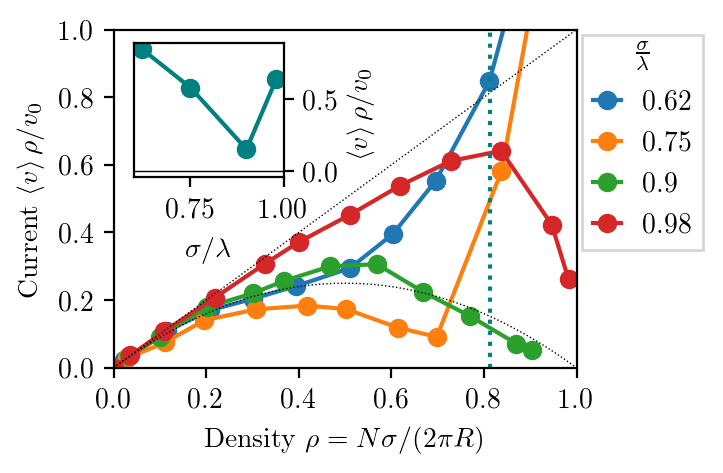

In [16]:
delta = -1.0942*ureg.cm
fig, ax1 = plt.subplots(1,1,figsize=(column+delta).to(ureg.inch).magnitude*np.array([1,.75]))

rho = np.linspace(0,1,100)
for sgm, curr in current.groupby(["sigma"]):
    curr_dens = curr.groupby("density").mean()
    ax1.plot(np.insert(curr_dens.index.values,0,0),
             np.insert(curr_dens.norm_current.values,0,0),"-o", label=sgm)
    
ratio = 1
ax1.plot(rho,rho*(1-rho)*ratio,':', color="black",linewidth = 0.5)
ax1.plot(rho,rho*ratio,':',color="black",linewidth = 0.5)
ax1.set_xlabel(r"Density $\rho=N\sigma/(2\pi R)$ ")
ax1.set_ylabel(r"Current $\left<v\right>\rho/v_0$")
ax1.plot([0,1],[0,0], color = "black", linewidth = 0.5)
ax1.set_xlim([0,1])
ax1.set_ylim([0,ratio])

ax2 = fig.add_axes([0.16, 0.55, 0.25, 0.3])

#for rho, curr in current[np.mod(current.test,2)==1].groupby(["test"]):
#    curr_sigm = curr.groupby("sigma").mean()

curr_sigm = current[current.test==8].groupby("sigma").mean()

ax2.plot(curr_sigm.index,
         curr_sigm.norm_current.values,"-o",
         label="%2.2f"%curr_sigm["density"].mean(),
         color = "teal")
dens = current[current.test==8].groupby("sigma").mean().density.mean()
ax1.plot([dens,dens],[0,100],color="teal", linestyle=":")

ax2.set_xlabel(r"$\sigma/\lambda$ ")
ax2.set_ylabel(r"$\left<v\right>\rho/v_0$")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.plot([0.6,1],[0,0], color = "black", linewidth = 0.5)
ax2.set_xlim([0.6,1])

#ax2.legend(title = r"$\rho$",bbox_to_anchor = (1,1));
ax1.legend(title = r"$\frac{\sigma}{\lambda}$",
           bbox_to_anchor = (1,1), loc="upper left",
           fancybox = False,
           handlelength = 1, 
           borderaxespad = 0.2);

fig.savefig('CurrentvsDensity.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

input1 = PdfFileReader(open('CurrentvsDensity.pdf', 'rb'))
size = list(input1.getPage(0).mediaBox)
display(np.array(size,dtype="float")/28.3465)
error = (column.to(ureg.cm).magnitude-np.array(size,dtype="float")/28.3465)[2]*ureg.cm
print(error,":",delta,"->",error+delta)

# Figure 3: Density Waves

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mpc
import matplotlib as mpl
import pint
import scipy.optimize as spo
import scipy.spatial as spa
import pandas as pd
from tqdm import tqdm_notebook

#from PyPDF2 import PdfFileReader

idx = pd.IndexSlice
%matplotlib inline


In [3]:
# From https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams['text.latex.preamble'] = [
       #r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       #r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

mpl.rcParams.update({'figure.dpi': 200})

mpl.rcParams.update({'font.size': 10})

ureg = pint.UnitRegistry()
column = 8.68*ureg.cm
two_columns = 18*ureg.cm

In [4]:
old_cm_numeric = mpl.cm.seismic((np.linspace(0,1,256)**(1/4)))
new_cm = mpl.colors.ListedColormap(old_cm_numeric)

In [5]:
trj = pd.read_csv("DensityWaves_TRJ_Test45.dat",sep = "\t",index_col = [0,1])
trj.head()

FileNotFoundError: [Errno 2] File b'DensityWaves_TRJ_Test45.dat' does not exist: b'DensityWaves_TRJ_Test45.dat'

In [23]:
def get_polygons(x,y1,y2,array):
    
    p = [((x[i],y1[i]),(x[i+1],y1[i+1]),(x[i+1],y2[i+1]),(x[i],y2[i]))
        for i,d in enumerate(x[:-2]) if (y1[i]<y2[i])&(y1[i+1]<y2[i+1])]
    array = np.array([array.values[i]
         for i,d in enumerate(x[:-2]) if (y1[i]<y2[i])&(y1[i+1]<y2[i+1])])
    
    return p, array
    
def fill_between_trj(trj, field, color_field, ax = None, **kargs):
    
    if ax is None:
        ax = plt.gca()
        
    polygons = []
    colors = []
    
    for part in tqdm_notebook(trj.index.get_level_values("id").unique()[:-1]):
        
        x = trj.loc[idx[:,part],:].time.values
        y1 = trj.loc[idx[:,part],field].values
        y2 = trj.loc[idx[:,part+1],field].values
                
        p, c = get_polygons(x,y1,y2,trj.loc[idx[:,part+1],color_field])
        polygons += p
        colors = np.concatenate([colors,c])
        
    x = trj.loc[idx[:,part+1],:].time.values
    y1 = trj.loc[idx[:,part+1],field].values
    y2 = trj.loc[idx[:,0],field].values
    
    p, c = get_polygons(x,y1,y2,trj.loc[idx[:,0],color_field])
    polygons += p
    colors = np.concatenate([colors,c])
        
    #Poly = ax.add_collection(mpc.PolyCollection(polygons,**kargs))
    #Poly.set_array(colors)
    return polygons, colors

In [24]:
N_traps = 27

distance_between_traps = (2*np.pi)/27

In [25]:
trj["vtheta"] = trj.theta_dot_prime*trj.r*0.1805

In [ ]:
times = [110,127,160,175]

A Jupyter Widget

array([ 0.        ,  0.        , 17.99375898,  7.2501151 ])

0.006241020475190595 centimeter : 8.82 centimeter -> 8.82624102047519 centimeter


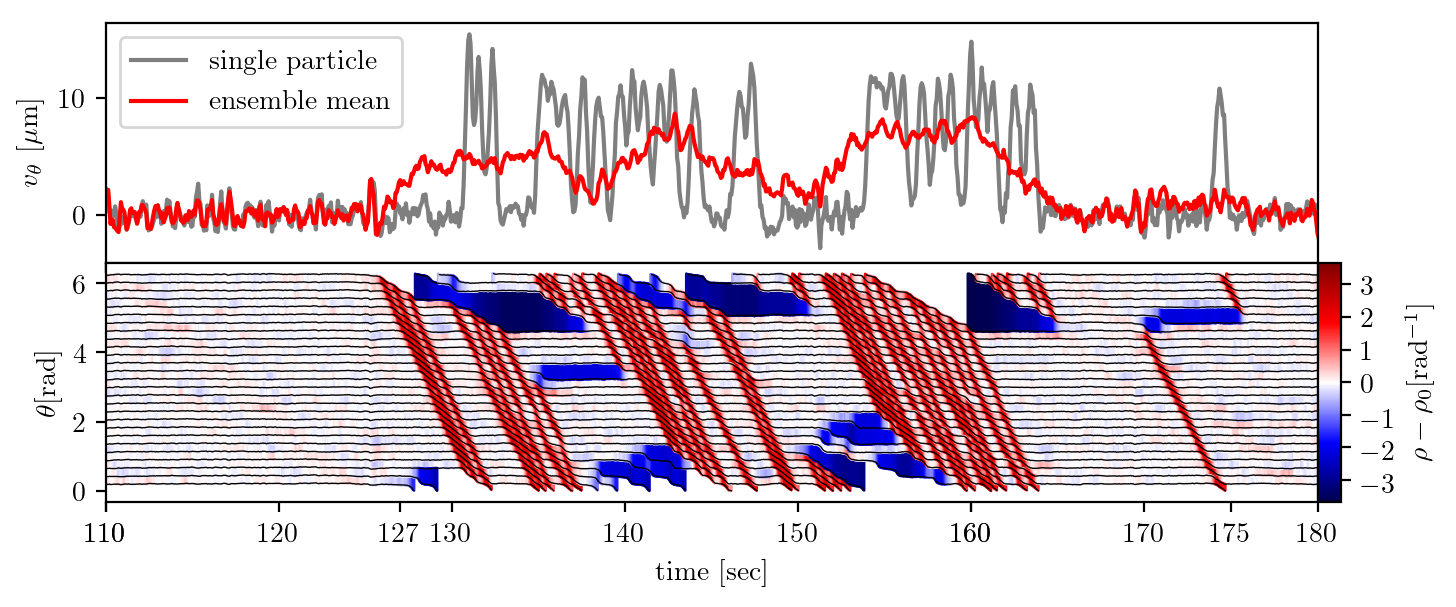

In [92]:
delta = 8.82*ureg.cm
fig, ax = plt.subplots(2,1,
                       figsize=(two_columns+delta).to(ureg.inch).magnitude*np.array([1,.3]),
                       sharex=True)

fig.subplots_adjust(hspace=0, right = 0.8)

field = "theta_prime"

polygons,colors = fill_between_trj(trj, field, "delta")

Poly = ax[1].add_collection(mpc.PolyCollection(polygons, cmap="seismic"))
colors = 1/(colors)-1/distance_between_traps
Poly.set_array(colors)
Poly.set_clim(vmin=min(colors), vmax=-min(colors))
Poly.set_edgecolor("face")

y = trj.loc[:,["theta_prime","time"]].copy(deep=True)
y[np.abs(y.groupby("id").diff()["theta_prime"])>np.pi]=np.NaN

for i, y_i in y.groupby("id"):
    ax[1].plot(y_i.time, y_i["theta_prime"],color="black",linewidth = 0.5)

#plt.colorbar(Poly)
axcb = fig.colorbar(Poly, pad=0, ax = ax, 
                    shrink=0.5, anchor = (0.0, 0.0),
                    aspect = 10)

axcb.set_label(r'$\rho-\rho_0$[rad$^{-1}$]')

ax[1].set_xlim([110,180])
#plt.ylim([0,2*np.pi])
ax[1].set_xlabel(r"time [sec]")
ax[1].set_ylabel(r"$\theta$[rad]");

for part,trj_part in trj.loc[idx[:,[0]],:].groupby("id"):
    ax[0].plot(trj_part.time,-trj_part.vtheta.rolling(5).mean(),
             color="black",alpha = 0.5)

ax[0].plot(trj.groupby("frame").mean().time,
         -trj.groupby("frame").mean().vtheta.rolling(5).mean(),color = "red")

ax[0].legend([r"single particle", r"ensemble mean"])

ax[0].set_ylabel(r"$v_\theta$ [$\mu{}$m]")

ax[1].set_xticks(np.concatenate([plt.xticks()[0],times]));
ticks = ax[1].xaxis.get_major_ticks()

fig.savefig('Density_Waves1.pdf', 
            pad_inches = 0,
            bbox_inches = "tight")

input1 = PdfFileReader(open('Density_Waves1.pdf', 'rb'))
size = list(input1.getPage(0).mediaBox)
display(np.array(size,dtype="float")/28.3465)
error = (two_columns.to(ureg.cm).magnitude-np.array(size,dtype="float")/28.3465)[2]*ureg.cm
print(error,":",delta,"->",error+delta)

In [27]:
import pims as pm

In [31]:
video = pm.Video("Test45_2019_04_26_19_03_38.avi")

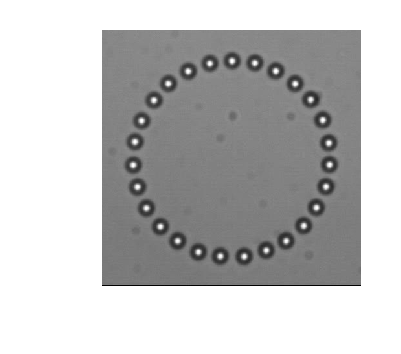

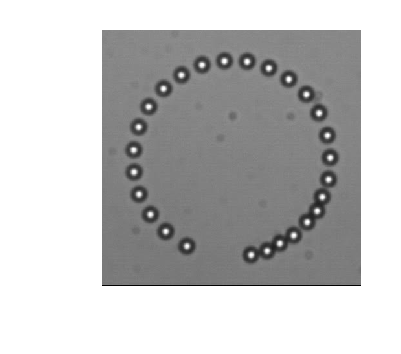

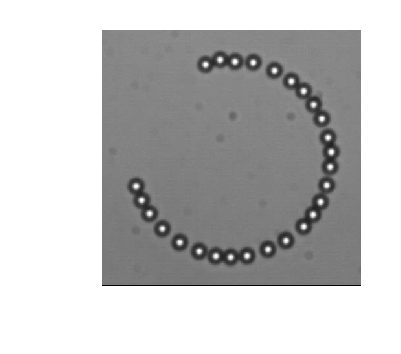

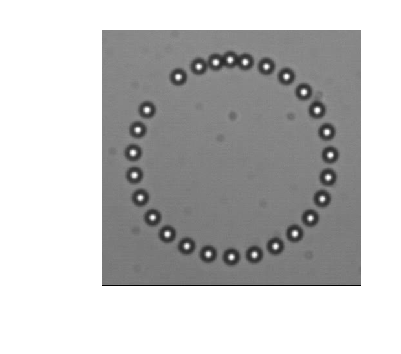

In [34]:
for t in times:
    
    img = video[trj[trj.time == t].index.get_level_values("frame").unique().values[0]]
    
    fig = plt.figure(figsize=(column).to(ureg.inch).magnitude*np.array([0.5,0.5]),frameon=False)

    center = np.array([367,198])

    size = np.array(np.shape(img))

    dx = -center[0]+size[1]/2
    dy = -center[1]+size[0]/2

    plt.imshow(img, extent = [-size[1]/2+dx, size[1]/2+dx,
                              -size[0]/2+dy, size[0]/2+dy])

    plt.ylim([-200,200])
    plt.xlim([-200,200])

    plt.gca().set_axis_off()

    fig.savefig('Exp_Images_t%u.pdf'%t, 
                pad_inches = 0,
                bbox_inches = "tight")